In [1]:
import xfelmay2019 as xfel

# Plot options
import matplotlib.pyplot as plt

# Import required libraries
import numpy as np
import pyqtgraph as pg

# Import karabo libraries
import karabo_bridge as kb
import karabo_data as kd

Welcome to xfelmay2019 version 0+untagged.118.g3a3eb8d


In [2]:
Path ='/gpfs/exfel/exp/SQS/201802/p002176/raw'
roi=(266000 - 200,266000 + 100)
run = 98

#Neon ROI's
onePlus=(271000,272000)
lightPeak=(266000 - 200,266000 + 100) 
highCharge=(267000, 270000)

# CorrelationPlot for Integrated Light Peak on TOF v FEL pulse energy

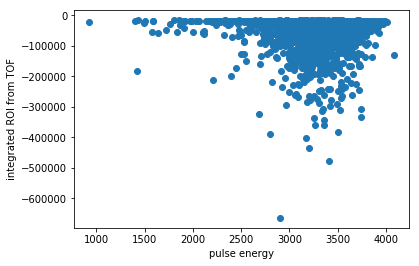

In [12]:
xfel.correlationPlots(run, Path, highCharge, offset = 0)

#  CorrelationPlot for Integrated MCP v FEL pulse energy

BE WARY OF THIS FUNCTION!!!! Might not return true PE depending on train settings.


Text(0, 0.5, 'Integrated MCP')

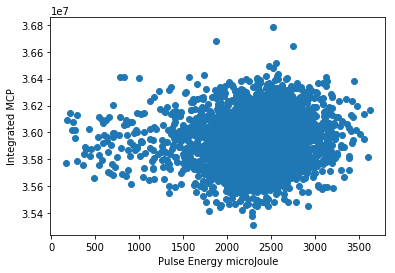

In [5]:
runNum = 98
ptids, PEs = xfel.getPulseEnergies( runNum , Path )


def getRunMCP( runNumber, path,
               dirspec='SQS_DPU_LIC/CAM/YAG_UPSTR:daqOutput',
               elementspec='data.image.pixels' ):
     '''
     gets MCP data for a given run
         inputs
             runNumber = number of run of interest
             path = path for data; defined at the top
         outputs
             MCPdata
             trainIds

     '''
     run = xfel.runFormat( runNumber )
     runData = kd.RunDirectory(path+run)

     data = runData.get_array( dirspec,elementspec )
     mcpdata=np.asarray(data)
     trainIds =np.asarray(data.trainId)
     return mcpdata, trainIds


mcp,mtids = getRunMCP( runNum, Path )


summcp = np.sum(mcp,(1,2))

_,pinds,minds = np.intersect1d( ptids, mtids, return_indices=True)
subsum = summcp[minds]
subpes = PEs[pinds]


plt.scatter( subpes,subsum )
plt.xlabel('Pulse Energy microJoule')
plt.ylabel('Integrated MCP')